# Análisis de campañas de alivio financiero y propuesta para recuperación de cartera vencida en una entidad financiera

# *PROYECTO EN CONSTRUCCIÓN*

<img width="400" alt="image" src="https://github.com/user-attachments/assets/8a1e13c2-ff85-4c60-9ca3-51979bd4326a" />

## Breve descripción y alcance del proyecto

En el presente proyecto, se realiza el análisis de los datos correspondientes a una campaña que realiza la entidad financiera, a la cual se la referirá mediante el nombre ficticio ***Banco XYZ***, con el fin de recuperar al menos un 60% de su cartera vencida.

Este inconveniente le afecta al Banco dado que en el último semestre ha existido una baja de más del 15% en utilidades en comparación con el período anterior y se ha determinado mediante los reportes de auditoría interna que el **Departamento de Cobranzas** es uno de los que más fuertemente han contibuído a este déficit en las utilidades.

Una de las principales razones que generan las pérdidas en este departamento es la **Gestión de cartera vencida*, razón por la cual se realiza este análisis sobre las campañas de alivio financiero ofertadas previamente por el banco, llamadas *diferimiento* y *normalización*, mismas que han tenido baja efectividad en cuanto a recuperación monetaria frente a las metas previamente establecida.

Se van a responder a las siguientes preguntas para poder entender de mejor manera cuál es el problema actual, sus causas y de que manera se podría brindar una solución que satizfaga las necesidades del **Departamento de Cobranzas del Banco XYZ** sin descuidar el bienestar del cliente:

1. ¿Qué perfiles de clientes están siendo atendidos por cada campaña y canal?
2. ¿Cómo se distribuye la deuda según diferentes variables de análisis?
2. ¿Cómo podría optimizarse el enfoque actual para mejorar la efectividad de las campañas?

Para ofrecer una posible solución al **Departamento de Cobranzas** se va a centrar el enfoque en base a que tipos de perfiles tienen mayor deuda, por más tiempo, dónde se concentran más deudores demográficamente, si es que es necesario modificar las campañas actualmente ofrecidas por el Banco, ofrecer incentivos a los clientes para que se pongan al días con sus deudas de igual manera en base a determinados parámetros o variables, etc.

**Nota:** *A lo largo del presente reporte se analizan datos reales, mismos que han sido debidamente ofuscados y/u omitidos intencionalmente con el fin de proteger posible información sensible, así como por mantener respeto y apego hacia las leyes de protección de datos tanto locales como internacionales.*

## Importación inicial de librerías y carga del **dataset**

Se importa la librería *pandas*, se carga el dataset y se muestran sus parámetros descriptivos incluyendo sus primeras filas, información general de tipos de datos, evaluación inicial de valores nulos, así como estadísticas descriptivas preliminares que otorga esta librería.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_morosidad = pd.read_csv("df_morosidad.csv")

## Limpieza y preprocesamiento de la información

En este análisis se va a revisar la calidad y consistencia de la información de entrada, incluyendo la posible existencia de valores nulos o en blanco, datos atípicos, entre otros.

In [3]:
df_morosidad.head()

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general
0,DNI-9502992,31 - 60 DIAS,8045.23,5686.38,0.00,143.94,PRECISO,36,RED COMERCIAL,SÍ,PICHINCHA,SIERRA,SECTOR PÚBLICO
1,DNI-5110681,16 - 30 DIAS,5924.60,0.00,92.60,98.97,PRECISO,22,DIGITAL,NO,PICHINCHA,SIERRA,TRANSPORTE Y LOGÍSTICA
2,DNI-6527606,6 - 15 DIAS,5125.55,0.00,74.08,148.94,PRECISO,10,DIGITAL,NO,GUAYAS,COSTA,COMERCIO
3,DNI-5095519,16 - 30 DIAS,4848.91,0.00,142.72,65.76,PRECISO,23,DIGITAL,NO,PICHINCHA,SIERRA,COMERCIO
4,DNI-9856629,16 - 30 DIAS,6621.77,5462.92,0.00,127.39,PRECISO,28,RED COMERCIAL,NO,PICHINCHA,SIERRA,SERVICIOS


In [4]:
df_morosidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo_cliente      4115 non-null   object 
 1   rango_morosidad     4115 non-null   object 
 2   monto_credito       4115 non-null   float64
 3   monto_por_vencer    4115 non-null   float64
 4   monto_vencido       4115 non-null   float64
 5   intereses           4115 non-null   float64
 6   producto_host       4115 non-null   object 
 7   dias_mora           4115 non-null   int64  
 8   gestor              4115 non-null   object 
 9   recibe_sueldo_fijo  4115 non-null   object 
 10  provincia_cliente   4090 non-null   object 
 11  region              4115 non-null   object 
 12  sector_general      4115 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 418.1+ KB


In [5]:
df_morosidad.describe()

,monto_credito,monto_por_vencer,monto_vencido,intereses,dias_mora
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,9889.804168,3742.993896,62.615878,165.204522,26.249332
std,11221.651826,7083.584846,135.121374,181.270760,13.370148
min,1124.280000,0.000000,0.000000,9.210000,10.000000
25%,4401.505000,0.000000,0.000000,60.200000,15.000000
50%,7072.150000,1493.760000,0.000000,113.110000,23.000000
75%,11161.935000,5186.860000,90.080000,204.440000,35.000000
max,209131.960000,138940.420000,3322.440000,2439.470000,60.000000


### Verificación de posibles valores blancos o nulos

In [6]:
df_morosidad.isna().sum()

codigo_cliente         0
rango_morosidad        0
monto_credito          0
monto_por_vencer       0
monto_vencido          0
intereses              0
producto_host          0
dias_mora              0
gestor                 0
recibe_sueldo_fijo     0
provincia_cliente     25
region                 0
sector_general         0
dtype: int64

Se puede ver en la celda anterior que de manera preliminar únicamente existen valores nulos en la variable *provincia_cliente* dentro del presente conjunto de datos, sin embargo si estos registros se eliminan se estaría subestimando la deuda que el Banco debe recuperar.

### Verificación de posibles valores inconsistentes

Se realiza un análisis de los valores únicos por cada columna para determinar si podría resultar conveniente convertirlos al tipo categórico de pandas.

In [7]:
df_morosidad.dtypes

codigo_cliente         object
rango_morosidad        object
monto_credito         float64
monto_por_vencer      float64
monto_vencido         float64
intereses             float64
producto_host          object
dias_mora               int64
gestor                 object
recibe_sueldo_fijo     object
provincia_cliente      object
region                 object
sector_general         object
dtype: object

In [8]:
condiciones = [
    (df_morosidad["dias_mora"] >= 10) & (df_morosidad["dias_mora"] <= 20),
    (df_morosidad["dias_mora"] >= 21) & (df_morosidad["dias_mora"] <= 60)
]

resultados = ["NORMALIZACIÓN", "DIFERIMIENTO"]
df_morosidad["tipo_campania"] = np.select(condiciones, resultados, default="NO_APLICA")

In [9]:
posibles_columnas_categoricas = [
    "rango_morosidad",
    "producto_host",
    "gestor",
    "recibe_sueldo_fijo",
    "region",
    "sector_general",
    "tipo_campania"
]

for col in posibles_columnas_categoricas:
    print(f'Valores únicos en "{col}":')
    print(df_morosidad[col].unique())
    print("-" * 50)

Valores únicos en "rango_morosidad":
['31 - 60 DIAS' '16 - 30 DIAS' '6 - 15 DIAS']
--------------------------------------------------
Valores únicos en "producto_host":
['PRECISO' 'AUTOS' 'PRODUCTO MUJER' 'PRODUCTIVO' 'MICROFINANZAS' 'HABITAR']
--------------------------------------------------
Valores únicos en "gestor":
['RED COMERCIAL' 'DIGITAL']
--------------------------------------------------
Valores únicos en "recibe_sueldo_fijo":
['SÍ' 'NO']
--------------------------------------------------
Valores únicos en "region":
['SIERRA' 'COSTA' 'AMAZONIA' 'NO_ESPECIFICADO' 'GALAPAGOS']
--------------------------------------------------
Valores únicos en "sector_general":
['SECTOR PÚBLICO' 'TRANSPORTE Y LOGÍSTICA' 'COMERCIO' 'SERVICIOS'
 'INDUSTRIA / MANUFACTURA' 'MINERÍA Y EXTRACCIÓN'
 'SIN ACTIVIDAD ECONÓMICA' 'EDUCACIÓN Y SALUD' 'INDUSTRIA'
 'SECTOR FINANCIERO' 'AGROPECUARIO' 'CONSTRUCCIÓN'
 'TECNOLOGÍA Y TELECOMUNICACIONES']
--------------------------------------------------
Valore

Se puede observar que no existen valores inconsistentes al haber analizado los valores únicos en cada columna las columnas o variables ***rango_morosidad***, ***producto_host***, ***gestor***, ***recibe_sueldo_fijo***, ***region*** y ***sector_general*** pueden convertirse a un tipo de variable categórico. Además la variable ***recibe_sueldo_fijo*** puede convertirse a binaria para un procesamiento más eficiente.

In [10]:
df_morosidad[posibles_columnas_categoricas] = df_morosidad[posibles_columnas_categoricas].astype("category")
df_morosidad["recibe_sueldo_fijo"] = df_morosidad["recibe_sueldo_fijo"]\
    .map({"SI": True, "NO": False}).astype("bool")

In [11]:
df_morosidad.dtypes

codigo_cliente          object
rango_morosidad       category
monto_credito          float64
monto_por_vencer       float64
monto_vencido          float64
intereses              float64
producto_host         category
dias_mora                int64
gestor                category
recibe_sueldo_fijo        bool
provincia_cliente       object
region                category
sector_general        category
tipo_campania         category
dtype: object

Se verifican también los valores mínimos y máximos con el fin de entender cuáles de los valores no pueden ser igual a cero (0).

**Valores numéricos mínimos:**

In [12]:
df_morosidad.select_dtypes(include="number").min().apply(lambda x: f"{x:,.2f}")

monto_credito       1,124.28
monto_por_vencer        0.00
monto_vencido           0.00
intereses               9.21
dias_mora              10.00
dtype: object

**Valores numéricos máximos:**

In [13]:
df_morosidad.select_dtypes(include="number").max().apply(lambda x: f"{x:,.2f}")

monto_credito       209,131.96
monto_por_vencer    138,940.42
monto_vencido         3,322.44
intereses             2,439.47
dias_mora                60.00
dtype: object

**Diferencia absoluta entre monto vencido y monto por vencer:**

In [14]:
np.min(np.abs(df_morosidad["monto_por_vencer"] - df_morosidad["monto_vencido"]))

0.29

Se observan algunos apectos relevantes en cuanto a estos datos, el primero es que el rango de días en mora en el *dataset* está comprendido entre 10 y 60 días, mientras que los montos por vencer y montos vencidos pueden tener valores en cero (0), sin embargo la resta de ambos jamás puede ser cero (0), esto debido a que en el presente conjunto de datos únicamente se contemplan a clientes que cuenten todavía con saldos o valores pendientes en sus préstamos a la fecha de corte del conjunto de datos.

A continuación se analizará si es que existen clientes que tengan al mismo tiempo *montos vencidos* y *montos por vencer* y de ser así se determinará si se trata o no de posibles inconsistencias realizando análisis más exhaustivos de ser el caso.

In [15]:
len(df_morosidad.query("monto_por_vencer != 0 and monto_vencido != 0"))

0

In [16]:
print(len(df_morosidad.query("monto_vencido == 0")))
print(len(df_morosidad.query("monto_por_vencer == 0")))

print()

print(len(df_morosidad.query("tipo_campania == 'DIFERIMIENTO'")))
print(len(df_morosidad.query("tipo_campania == 'NORMALIZACIÓN'")))

2251
1864

2340
1775


In [17]:
resaltado = pd.DataFrame({
    'monto_por_vencer_resaltado': [
        len(df_morosidad.query("tipo_campania == 'DIFERIMIENTO' & monto_por_vencer > 0")),
        len(df_morosidad.query("tipo_campania == 'NORMALIZACIÓN' & monto_por_vencer > 0"))
    ],
    'monto_vencido_resaltado': [
        len(df_morosidad.query("tipo_campania == 'DIFERIMIENTO' & monto_vencido > 0")),
        len(df_morosidad.query("tipo_campania == 'NORMALIZACIÓN' & monto_vencido > 0"))
    ]
}, index=['DIFERIMIENTO', 'NORMALIZACIÓN'])

resaltado


,monto_por_vencer_resaltado,monto_vencido_resaltado
DIFERIMIENTO,1266,1074
NORMALIZACIÓN,985,790


In [18]:
total_normalizacion = df_morosidad.query("tipo_campania == 'NORMALIZACIÓN'")["monto_credito"].sum()
total_diferimiento = df_morosidad.query("tipo_campania == 'DIFERIMIENTO'")["monto_credito"].sum()

print(f"Total monto_credito NORMALIZACIÓN:\t{total_normalizacion:,.2f}")
print(f"Total monto_credito DIFERIMIENTO:\t{total_diferimiento:,.2f}")

Total monto_credito NORMALIZACIÓN:	16,906,137.81
Total monto_credito DIFERIMIENTO:	23,790,406.34


In [19]:
print(len(df_morosidad))

4115


Como se observa en la celda anterior, no existen registros (*clientes*) con *montos por vencer* y al mismo tiempo *montos vencidos*, lo cual indica de manera preliminar que los clientes con *montos por vencer* podrían ser clientes que todavía no caen en **mora** mientras que los clientes con *montos vencidos* serían aquellos que ya están en mora, sin emabrgo al ser este un conjunto de datos que trata sobre clientes en mora y haberse demostrado previamente que el rango de mora para todos y cada uno de los clientes se encuentra entre **10 y 60 días**, este relato no tendría sentido.

Con el objetivo de ampliar el análisis se procederá a graficar la distribución de *días en mora* para entender su relación con los clientes que están en estado **POR VENCER** o **VENCIDO**. Para ello, en primer lugar se agregará una categoría llamada **estado_mora** con los estados mencionados previamente con el fin de simplificar el análisis.

In [20]:
df_morosidad["estado_mora"] = np.where(
    df_morosidad["monto_por_vencer"] != 0, "POR VENCER", "VENCIDO"
)

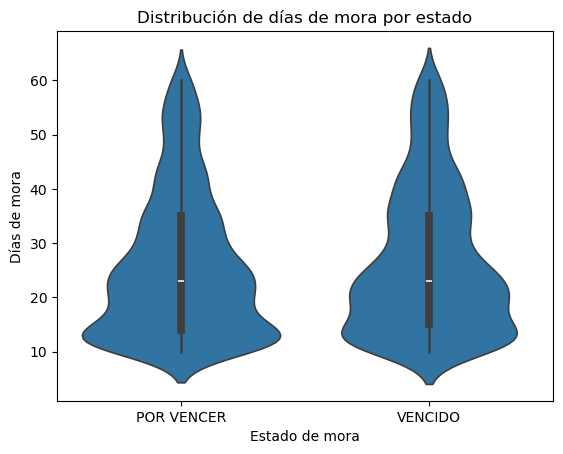

In [21]:
sns.violinplot(data=df_morosidad, x="estado_mora", y="dias_mora")
plt.title("Distribución de días de mora por estado")
plt.xlabel("Estado de mora")
plt.ylabel("Días de mora")
plt.show()

El análisis del boxplot muestra que las distribuciones de días en mora son muy similares entre los clientes con montos “por vencer” y aquellos con montos “vencidos”, tanto a nivel de mediana como de cuartiles. Esto indica que el hecho de que uno de los valores (monto_vencido o monto_por_vencer) sea cero no significa que el cliente no esté en mora, ni que la otra columna sea realmente cero. Más bien, refleja que el banco segmenta los clientes para resaltar en algunos casos los montos por vencer y en otros los montos vencidos.

Asimismo, se puede inferir que el monto_credito representa el saldo pendiente a la fecha de corte, y no el crédito total inicial otorgado. La columna resaltada (monto_por_vencer o monto_vencido) se utiliza para mostrar un valor específico sin duplicar información, pero el monto_credito en realidad corresponde a la suma de ambos montos. Además, el banco no determina qué columna resaltar, es decir **POR VENCER** o **VENCIDO** basándose en los días de mora, sino que parece hacerlo según criterios internos de presentación o gestión.

In [22]:
# Calcular porcentajes redondeados a 4 decimales
df_morosidad["pct_vencido"] = (df_morosidad["monto_vencido"] / df_morosidad["monto_credito"]).round(4)
df_morosidad["pct_por_vencer"] = (df_morosidad["monto_por_vencer"] / df_morosidad["monto_credito"]).round(4)

# Revisar los primeros registros
df_morosidad[["monto_credito", "monto_vencido", "monto_por_vencer", "pct_vencido", "pct_por_vencer"]].head()

,monto_credito,monto_vencido,monto_por_vencer,pct_vencido,pct_por_vencer
0,8045.23,0.00,5686.38,0.0000,0.7068
1,5924.60,92.60,0.00,0.0156,0.0000
2,5125.55,74.08,0.00,0.0145,0.0000
3,4848.91,142.72,0.00,0.0294,0.0000
4,6621.77,0.00,5462.92,0.0000,0.8250


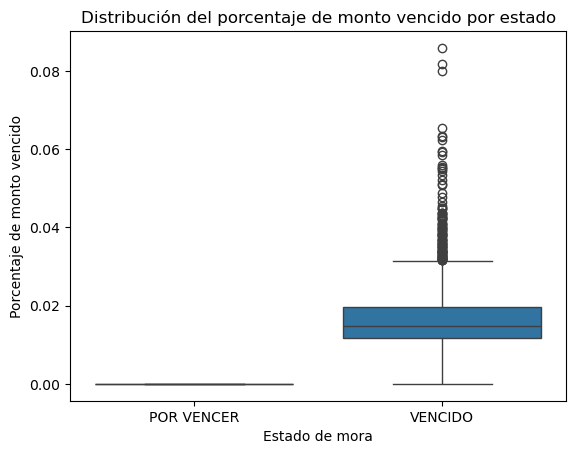

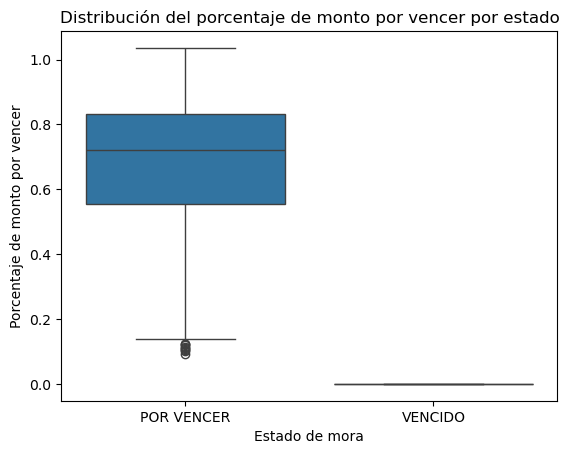

In [23]:
sns.boxplot(data=df_morosidad, x="estado_mora", y="pct_vencido")
plt.title("Distribución del porcentaje de monto vencido por estado")
plt.xlabel("Estado de mora")
plt.ylabel("Porcentaje de monto vencido")
plt.show()

sns.boxplot(data=df_morosidad, x="estado_mora", y="pct_por_vencer")
plt.title("Distribución del porcentaje de monto por vencer por estado")
plt.xlabel("Estado de mora")
plt.ylabel("Porcentaje de monto por vencer")
plt.show()

## Exploración de datos

Con el fin de ayudar a recuperar la cartera vencida, el **Banco XYZ** propuso originalmente realizar 2 tipos de campañas para ayudar a los deudores en estado de mora a aliviar ya sea los intereses o el plazo de pago de las cuotas restantes de sus deudas. Estas campañas son:

1. **Diferimiento**: Es una medida mediante la cual una entidad financiera pospone temporalmente el pago de una o más cuotas de un crédito, sin que eso implique que el cliente ha incumplido. Esta campaña se aplicará en clientes que tengan entre 21 y 60 días en mora.
2. **Normalización**: Es un proceso mediante el cual una entidad financiera busca reconducir un crédito moroso a un estado "al día", generalmente a través de reestructuración, refinanciamiento o acuerdos de pago según la capacidad real del cliente. Esta campaña se aplicará en clientes que tengan entre 10 y 20 días en mora.

*Más adelante en este documento se evaluará si es necesario realizar ajustes en los rangos de **días en mora** requeridos para calificar a cualquiera de estas campañas.*

El siguiente paso consiste en crear una columna condicional que refleje el tipo de campaña que se va a ofertar a cada cliente según la cantidad de días que el mismo se mantenga en mora.

In [24]:
df_morosidad.sample(5)

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general,tipo_campania,estado_mora,pct_vencido,pct_por_vencer
2238,DNI-3882771,6 - 15 DIAS,2420.11,0.00,34.32,106.78,MICROFINANZAS,12,DIGITAL,True,SANTA ELENA,COSTA,COMERCIO,NORMALIZACIÓN,VENCIDO,0.0142,0.0000
2438,DNI-7347481,16 - 30 DIAS,5367.22,3909.79,0.00,112.24,MICROFINANZAS,30,DIGITAL,False,COTOPAXI,SIERRA,COMERCIO,DIFERIMIENTO,POR VENCER,0.0000,0.7285
1109,DNI-2964279,16 - 30 DIAS,2040.97,0.00,44.12,35.30,PRECISO,22,RED COMERCIAL,True,PICHINCHA,SIERRA,TECNOLOGÍA Y TELECOMUNICACIONES,DIFERIMIENTO,VENCIDO,0.0216,0.0000
2706,DNI-1165041,31 - 60 DIAS,27075.89,16623.18,0.00,423.89,PRECISO,53,DIGITAL,False,SANTO DOMINGO DE LOS TSACHILAS,COSTA,EDUCACIÓN Y SALUD,DIFERIMIENTO,POR VENCER,0.0000,0.6139
2270,DNI-5278983,31 - 60 DIAS,7408.31,5559.96,0.00,158.55,MICROFINANZAS,50,RED COMERCIAL,False,SUCUMBIOS,AMAZONIA,SERVICIOS,DIFERIMIENTO,POR VENCER,0.0000,0.7505


In [25]:
df_morosidad["tipo_campania"].value_counts()

tipo_campania
DIFERIMIENTO     2340
NORMALIZACIÓN    1775
Name: count, dtype: int64

### Clientes por tipo de campaña

In [26]:
# plt.figure(figsize=(4, 3))
# sns.countplot(
#     data=df_morosidad,
#     x="tipo_campania"
# )

# plt.title("Clientes por tipo de campaña")
# plt.ylabel("Cantidad de clientes")
# plt.xlabel("Campaña")
# plt.show()

In [27]:
# plt.figure(figsize=(4, 3))
# sns.countplot(
#     data=df_morosidad,
#     x="tipo_campania"
# )

# plt.title("Clientes por tipo de campaña")
# plt.ylabel("Cantidad de clientes")
# plt.xlabel("Campaña")
# plt.show()

### Análisis por Canal de Gestión

In [28]:
# plt.figure(figsize=(5.5, 3.5))

# sns.countplot(
#     data=df_morosidad,
#     x="tipo_campania",
#     hue="gestor"
# )

# plt.title("Clientes por campaña y canal de atención")
# plt.ylabel("Cantidad de clientes")
# plt.xlabel("Campaña")
# plt.legend(title="Canal")
# plt.show()

In [29]:
# sns.countplot(
#     data=df_morosidad,
#     x="tipo_campania",
#     hue="recibe_sueldo_fijo"
# )
# plt.title("Clientes con/sin sueldo fijo por campaña")
# plt.ylabel("Cantidad de clientes")
# plt.xlabel("Campaña")
# plt.legend(title="Recibe sueldo fijo")
# plt.show()

In [30]:
# sns.scatterplot(data=df_morosidad, x="dias_mora", y="monto_vencido", hue="tipo_campania")
# plt.title("Días de mora vs Monto vencido")
# plt.xlabel("Días en mora")
# plt.ylabel("Monto vencido ($)")
# plt.legend(title="Campaña")
# plt.show()

Se puede observar que en la campaña de **DIFERIMIENTO** predominan deudas bajas entre USD 100 y USD 500 aproximadamente, con variabilidad relativamente baja al existir pocos valores extremos.

Por otro lado, en el caso de la campaña de **NORMALIZACIÓN** el monto vencido promedio se muestra ligeramente más alto, con una mayor presencia de valores atípicos, rondando en algunos casos valores por encima de USD 1000 y en ocasiones incluso USD 3000.

Se puede ver entonces de manera preliminar que estos clientes representan un riesgo de impago más alto para el banco, por lo cual se podría considerar para la campaña de **NORMALIZACIÓN** plantear una estrategia correctiva mientras que en **DIFERIMIENTO** podría ser todavía una estrategia preventiva.

In [31]:
# provincia_counts = df_morosidad["region"].value_counts().sort_values()
# provincia_counts.plot(kind="barh", figsize=(8,6))
# plt.title("Clientes por región")
# plt.xlabel("Cantidad de clientes")
# plt.ylabel("Región")
# plt.show()

In [32]:
# provincia_counts = df_morosidad["provincia_cliente"].value_counts().sort_values()\
# .nlargest(6)
# provincia_counts.plot(kind="barh", figsize=(5,3))
# plt.title("Clientes por región")
# plt.xlabel("Cantidad de clientes")
# plt.ylabel("Provincia")
# plt.show()

In [33]:
# plt.figure(figsize=(10,6))
# sns.countplot(
#     data=df_morosidad,
#     y="sector_general",
#     hue="tipo_campania",
#     order=df_morosidad["sector_general"].value_counts().index
# )
# plt.title("Clientes por sector económico y campaña")
# plt.xlabel("Cantidad de clientes")
# plt.ylabel("Sector económico")
# plt.legend(title="Campaña")
# plt.show()

In [34]:
# print("Total de clientes:\t\t", len(df_morosidad))
# print(f"Total monto vencido: \t\t${df_morosidad['monto_vencido'].sum():,.2f}")
# print(f"Total intereses acumulados: \t${df_morosidad['intereses'].sum():,.2f}")
# print("Clientes con sueldo fijo:\t", df_morosidad[df_morosidad["recibe_sueldo_fijo"] == True].shape[0])

In [35]:
df_morosidad[['monto_credito', 'monto_por_vencer', 'monto_vencido']].sum() \
.apply(lambda x: f"$ {x:,.2f}")

monto_credito       $ 40,696,544.15
monto_por_vencer    $ 15,402,419.88
monto_vencido          $ 257,664.34
dtype: object

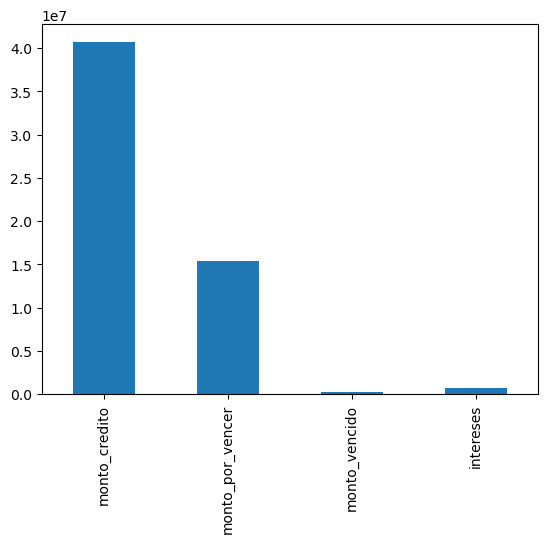

In [36]:
df_morosidad[['monto_credito', 'monto_por_vencer', 'monto_vencido', 'intereses']].sum() \
.plot(kind= "bar")

plt.show()

In [37]:
df_morosidad.groupby(["tipo_campania"], observed=True)\
    [['monto_credito', 'monto_por_vencer', 'monto_vencido', 'intereses']].sum()

,monto_credito,monto_por_vencer,monto_vencido,intereses
tipo_campania,,,,
DIFERIMIENTO,23790406.34,8824207.86,155554.39,393292.10
NORMALIZACIÓN,16906137.81,6578212.02,102109.95,286524.51


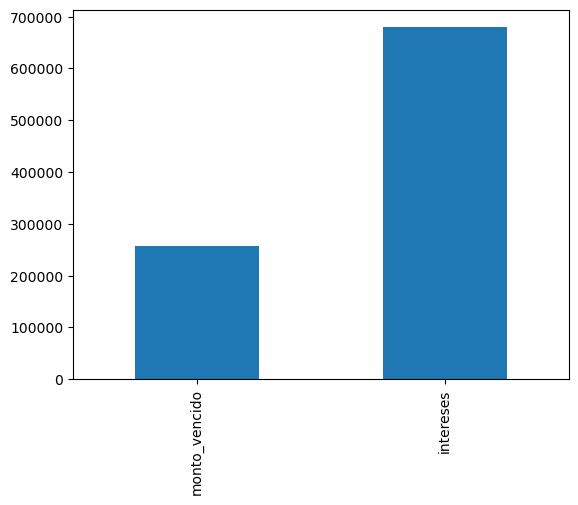

In [38]:
df_morosidad[['monto_vencido', 'intereses']].sum() \
.plot(kind= "bar")

plt.show()